In [7]:
import os
import pandas as pd
import kagglehub
import pickle
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [8]:
path = kagglehub.dataset_download("itsmesunil/bank-loan-modelling")
file_path = os.path.join(path, "Bank_Personal_Loan_Modelling.xlsx")
df = pd.read_excel(file_path, sheet_name=1, engine='openpyxl')
print("Columns:", df.columns)
print(df)

Using Colab cache for faster access to the 'bank-loan-modelling' dataset.
Columns: Index(['ID', 'Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal Loan', 'Securities Account',
       'CD Account', 'Online', 'CreditCard'],
      dtype='object')
        ID  Age  Experience  Income  ZIP Code  Family  CCAvg  Education  \
0        1   25           1      49     91107       4    1.6          1   
1        2   45          19      34     90089       3    1.5          1   
2        3   39          15      11     94720       1    1.0          1   
3        4   35           9     100     94112       1    2.7          2   
4        5   35           8      45     91330       4    1.0          2   
...    ...  ...         ...     ...       ...     ...    ...        ...   
4995  4996   29           3      40     92697       1    1.9          3   
4996  4997   30           4      15     92037       4    0.4          1   
4997  4998   63          39 

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [10]:
df.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937913,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747666,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [11]:
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
filtered_cols = [col for col in numeric_cols if df[col].nunique() > 15]
print("Columns considered for Z-score outlier detection:")
print(filtered_cols)

z_scores = stats.zscore(df[filtered_cols])
z_df = pd.DataFrame(z_scores, columns=filtered_cols)
threshold = 3
df_clean = df.copy()
outliers_dict = {}

for col in filtered_cols:
    if col not in ["ID", "ZIP Code"]:
        mask = np.abs(z_df[col]) > threshold
        outliers = df.loc[mask, col]
        if not outliers.empty:
            outliers_dict[col] = outliers
            print(f"\nOutliers detected in column '{col}':")
            print(outliers)

            # Replace outliers with mean
            mean_val = df[col].mean()
            df_clean.loc[mask, col] = mean_val
            print(f"Replaced outliers in '{col}' with mean: {mean_val}")

print("\nSummary of Outlier Counts After Replacement:")
for col, vals in outliers_dict.items():
    print(f"{col}: {len(vals)} outliers replaced")


Columns considered for Z-score outlier detection:
['ID', 'Age', 'Experience', 'Income', 'ZIP Code', 'CCAvg', 'Mortgage']

Outliers detected in column 'Income':
3896    224
4993    218
Name: Income, dtype: int64
Replaced outliers in 'Income' with mean: 73.7742

Outliers detected in column 'CCAvg':
9       8.9
18      8.1
55      8.0
131     7.2
145     7.4
       ... 
4652    8.0
4679    7.2
4782    7.2
4911    7.5
4937    8.6
Name: CCAvg, Length: 121, dtype: float64
Replaced outliers in 'CCAvg' with mean: 1.9379133333333332

Outliers detected in column 'Mortgage':
42      412
59      455
119     366
288     391
303     617
       ... 
4672    550
4698    400
4812    612
4842    590
4859    541
Name: Mortgage, Length: 105, dtype: int64
Replaced outliers in 'Mortgage' with mean: 56.4988

Summary of Outlier Counts After Replacement:
Income: 2 outliers replaced
CCAvg: 121 outliers replaced
Mortgage: 105 outliers replaced


/tmp/ipython-input-1305331915.py:23: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '73.7742' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_clean.loc[mask, col] = mean_val
/tmp/ipython-input-1305331915.py:23: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '56.4988' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_clean.loc[mask, col] = mean_val


In [12]:
df[df['Experience']<0]['Experience'].count()
df[df['Experience']<0]['Experience'].value_counts()
df['Experience'] = df['Experience'].apply(abs)

In [13]:
corr_matrix = df.corr()
print(corr_matrix)

                          ID       Age  Experience    Income  ZIP Code  \
ID                  1.000000 -0.008473   -0.008202 -0.017695  0.013432   
Age                -0.008473  1.000000    0.993991 -0.055269 -0.029216   
Experience         -0.008202  0.993991    1.000000 -0.046876 -0.028936   
Income             -0.017695 -0.055269   -0.046876  1.000000 -0.016410   
ZIP Code            0.013432 -0.029216   -0.028936 -0.016410  1.000000   
Family             -0.016797 -0.046418   -0.051851 -0.157501  0.011778   
CCAvg              -0.024672 -0.052030   -0.049750  0.645993 -0.004068   
Education           0.021463  0.041334    0.013919 -0.187524 -0.017377   
Mortgage           -0.013920 -0.012539   -0.011097  0.206806  0.007383   
Personal Loan      -0.024801 -0.007726   -0.008304  0.502462  0.000107   
Securities Account -0.016972 -0.000436   -0.000989 -0.002616  0.004704   
CD Account         -0.006909  0.008043    0.009735  0.169738  0.019972   
Online             -0.002528  0.013702

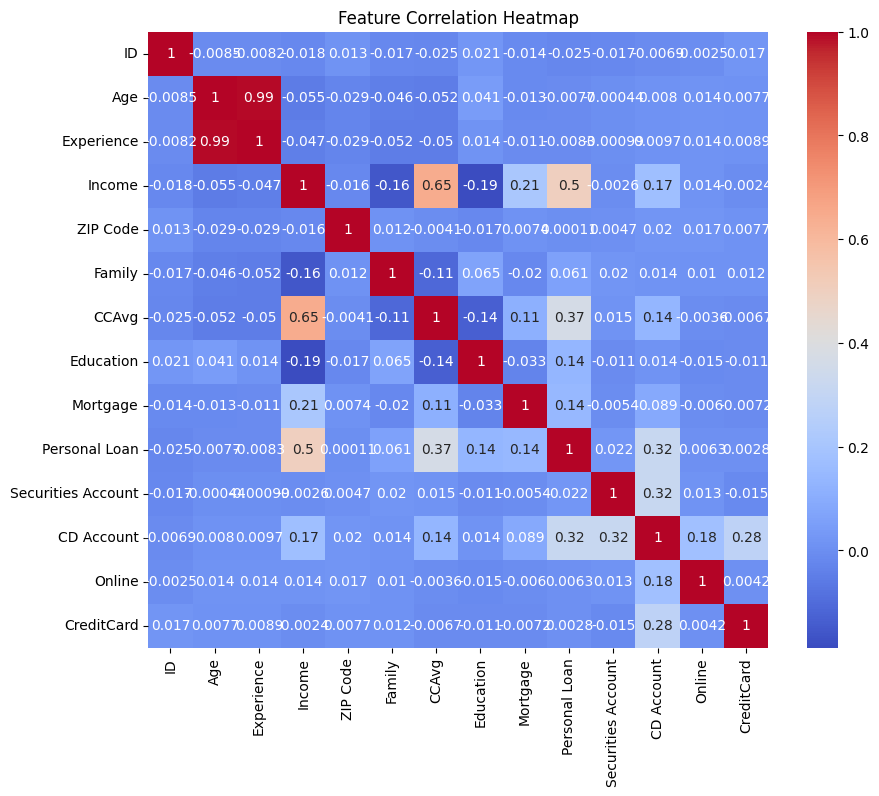

In [14]:
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()

In [16]:
threshold = 0.9
high_corr = np.where(np.abs(corr_matrix) > threshold)
high_corr_pairs = [(corr_matrix.index[x], corr_matrix.columns[y])
                   for x, y in zip(*high_corr) if x != y and x < y]
print("Highly correlated pairs (>0.9):", high_corr_pairs)


Highly correlated pairs (>0.9): [('Age', 'Experience')]


In [17]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df[['Age','Experience', 'Income', 'Family', 'CCAvg']])


In [18]:
pca = PCA(n_components=0.90)
X_reduced = pca.fit_transform(X_scaled)


Optimal number of clusters according to Silhouette Coefficient: 3
[np.float64(0.3073266819806692), np.float64(0.3429246745043665), np.float64(0.31948688676529374), np.float64(0.31396966560107487), np.float64(0.31458406966428326), np.float64(0.2983281246522029), np.float64(0.2862075814573007), np.float64(0.2894638197761432), np.float64(0.2800970046767129)]


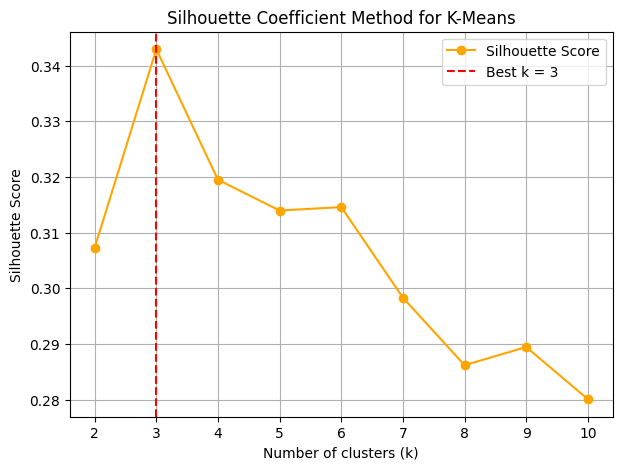

In [19]:
s_score = []
k_values = range(2, 11)

for k in range(2, 11):  # k = 2 to 10
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X_reduced)
    score = silhouette_score(X_reduced, labels)
    s_score.append(score)


best_k = k_values[np.argmax(s_score)]
print(f"Optimal number of clusters according to Silhouette Coefficient: {best_k}")
print(s_score)

plt.figure(figsize=(7,5))
plt.plot(k_values, s_score, marker='o', color='orange', label='Silhouette Score')
plt.axvline(best_k, color='red', linestyle='--', label=f'Best k = {best_k}')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Coefficient Method for K-Means')
plt.legend()
plt.grid(True)
plt.show()

In [20]:
final_model=KMeans(n_clusters=3, random_state=42)
df["Clusters"]=final_model.fit_predict(X_reduced)

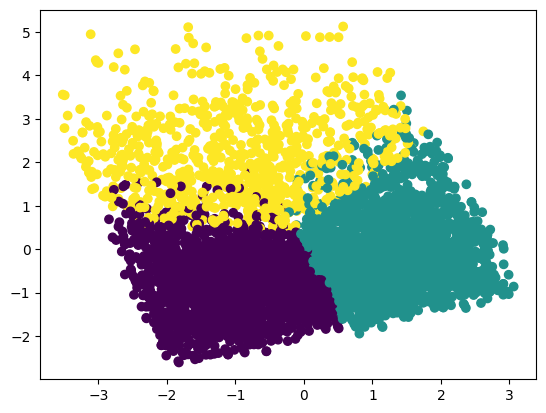

In [21]:
pca = PCA(2)
pca_comp = pca.fit_transform(scaled_df)
plt.scatter(pca_comp[:,0], pca_comp[:,1], c=df['Clusters'])

In [22]:
df.groupby('Clusters').mean()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
Clusters,,,,,,,,,,,,,,
0,2518.900488,35.270732,10.083902,60.079512,93225.331707,2.602439,1.357390,1.933659,49.791707,0.035610,0.106341,0.041951,0.583415,0.289268
1,2497.381954,55.705470,30.408602,59.038803,93094.178121,2.382422,1.366932,1.933146,50.995792,0.039271,0.100047,0.043946,0.604021,0.299673
2,2462.212084,43.443896,18.442663,147.255240,93122.241677,1.912454,4.911282,1.610358,87.966708,0.398274,0.110974,0.150432,0.611591,0.290999


In [23]:
silhouette = silhouette_score(X_reduced, df['Clusters'])
print('Silhouette Score:', silhouette)


Silhouette Score: 0.3429246745043665


In [24]:
with open('kmeans_model.pkl', 'wb') as f:
    pickle.dump(final_model, f)
